In [134]:
%run Function_set_gurobi.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt
import json
import os

In [135]:
from collections import defaultdict

import numpy as np
import gurobipy as gp
from gurobipy import GRB
from gurobipy import*
from gurobipy import quicksum

In [165]:
#network,pos = Make_Question(3,4,Density = 0.7, option = "1-norm", distance = 1)

i = 1

Width = 3
Height = 4

network = np.asarray(np.load("W%d_H%d_Benchmark/W%d_H%d_Benchmark%d.npy"%(Width, Height, Width, Height, i)))

print(network[0,1])
    
with open("W%d_H%d_Benchmark/W%d_H%d_Benchmark%d.json"%(Width, Height, Width, Height, i), 'r') as f:
    data = json.load(f)
    pos_convert = json.loads(data)
        
pos = {}
    
for key in pos_convert.keys():
    pos[int(key)] = tuple(pos_convert[key])

print(network)
print(pos)

0.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]
{0: (6.7, 8), 1: (4, 6), 2: (2, 6), 3: (0, 6), 4: (4, 4), 5: (2, 4), 6: (0, 4), 7: (2, 2), 8: (0, 2), 9: (4, 0), 10: (2, 0)}


In [166]:
network,pos = Make_Question(3,4,Density = 0.7, option = "1-norm", distance = 1)

print(network)
print(pos)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0.]]
{0: (6.7, 8), 1: (2, 6), 2: (2, 4), 3: (0, 4), 4: (4, 2), 5: (2, 2), 6: (0, 2), 7: (4, 0), 8: (2, 0)}


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (1, 2): '8', (2, 3): '10', (2, 5): '11', (3, 6): '13', (4, 5): '14', (4, 7): '15', (5, 6): '18', (5, 8): '19', (7, 8): '23', (2, 1): '9', (3, 2): '12', (5, 2): '16', (5, 4): '17', (6, 3): '20', (6, 5): '21', (7, 4): '22', (8, 5): '24', (8, 7): '25'}


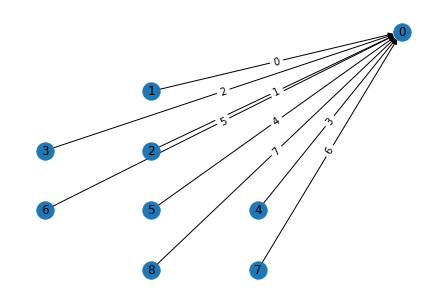

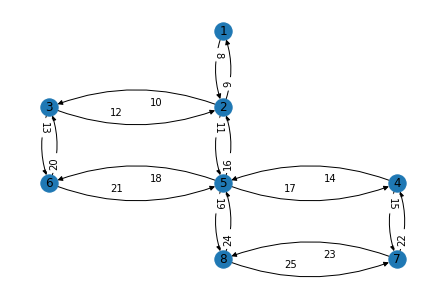

In [167]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

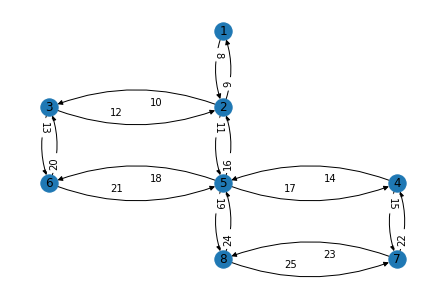

In [168]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

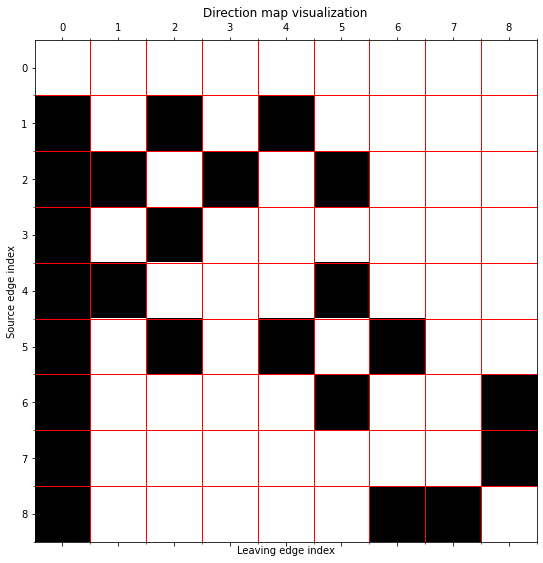

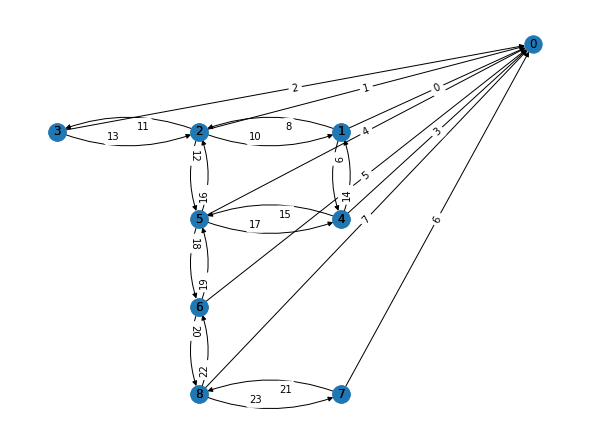

In [121]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [122]:
%run Function_set_gurobi.ipynb
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1


In [123]:
%run Function_set_gurobi.ipynb

print(Q)

# How many edges
edge_number = len(compelete_label)


# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
# test case : #basic_cost = np.arange(edge_number)

basic_cost = np.ones(edge_number) * 2


# flow cost (p)
flow_cost = np.ones(edge_number) 
p = 1


# make dictionary
edge_dictionary, Total = make_dictionary(edge_number, Q)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((Total, Total))


#print('N_tree  = ', N_tree )
#print('edge_dictionary  = ', edge_dictionary )

8


In [124]:
c_e = (np.tile(np.vstack(basic_cost),(1,Q+1)))
        
level_coeff = (np.tile(np.arange(1,Q + 1),(edge_number,1))).flatten()

In [125]:
def constraint_1(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_matched = []
    
    for vertex_selected in index:
            
        #print(int(compelete_label[(vertex, vertex_selected)]))
        
            index_matched.append( int(compelete_label[(vertex, vertex_selected)]) )
    
    return index_matched


In [126]:
def constraint_2(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index_out = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_out_matched = []
    
    for vertex_selected in index_out:
            
        index_out_matched.append( int(compelete_label[(vertex, vertex_selected)])  )
    
    index_in = np.hstack(np.asarray(np.where(Final_map[:,vertex])))
    
    index_in_matched = []
    
    for vertex_selected in index_in:
        index_in_matched.append( int(compelete_label[(vertex_selected, vertex )])  )

    
    return index_out_matched, index_in_matched

In [127]:


m_t_u = np.zeros(Q)
m_t_l = np.zeros(Q)
#m_t_l[3] = 1
m_t_l[2] = 1
m_t_u[:] = 3

print('m_t_l = ', m_t_l)

m_t_u = np.where(m_t_u < m_t_l, m_t_l, m_t_u)

print('m_t_u = ', m_t_u)

print("Q = ", Q)

m_t_l =  [0. 0. 1. 0. 0. 0. 0. 0.]
m_t_u =  [3. 3. 3. 3. 3. 3. 3. 3.]
Q =  8


In [132]:
try:

    # Create a new model
    m = gp.Model("Solar_panel_old_model")
    m.Params.LogToConsole = 0
    
    # Create variables
    x = m.addVars(edge_number, Q, vtype=GRB.BINARY, name="x")
    
    #print(x)
    # Set objective
    m.setObjective( quicksum(quicksum((p * j) * c_e[i,j]  * x[i,j] for i in range(Q , edge_number)) for j in range(Q))
                       + quicksum(quicksum(c_e[i,j]  * x[i,j] for i in range(edge_number)) for j in range(Q)) , GRB.MAXIMIZE)
    
    # Add constraint 1:
    for vertex in range(1, Q + 1):
    
        index = constraint_1(network, Q, edge_dictionary, compelete_label, vertex)

        # 
        m.addConstr(quicksum( quicksum(x[i,j] for j in range(Q)) for i in index) == 1, name=f'constraint_1_vertex_{vertex}')

    # Add constraint 2:  
    for vertex in range(1, Q + 1):
    
        index_out, index_in = constraint_2(network, Q, edge_dictionary, compelete_label, vertex)
    
        #print(index_out, index_in, level_coeff[index_in])
    
        m.addConstr( quicksum(quicksum( (j+1) * x[i,j] for j in range(Q)) for i in index_out) - quicksum( quicksum( (n+1) * x[m,n] for n in range(Q)) for m in index_in)  == 1, name=f'constraint_2_vertex_{vertex}')

    # Add constraint 3:
    for level in range(Q):
        
        m.addConstr( quicksum( x[m,level] for m in range(Q)) <= m_t_u [level], name=f'constraint_3_rhs_{level}')
        m.addConstr( quicksum( x[m,level] for m in range(Q)) >= m_t_l [level], name=f'constraint_3_lhs_{level}')

    # Optimize model
    m.optimize()
    #print (m.display())

    #$for v in m.getVars():
        #print('%s %g' % (v.varName, v.x))

    x_list = [str.replace(str.replace(v.varName,"]",""),"x[","") for v in m.getVars() if v.x == 1 and v.varName[0] =='x']
    
    #print(x_list, "The subtree number is", N_tree[int(s_choice[0])] )
    
    #print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi runtime is 0.026521682739257812 seconds
widths [1, 2, 3, 1, 2, 3, 5, 4]


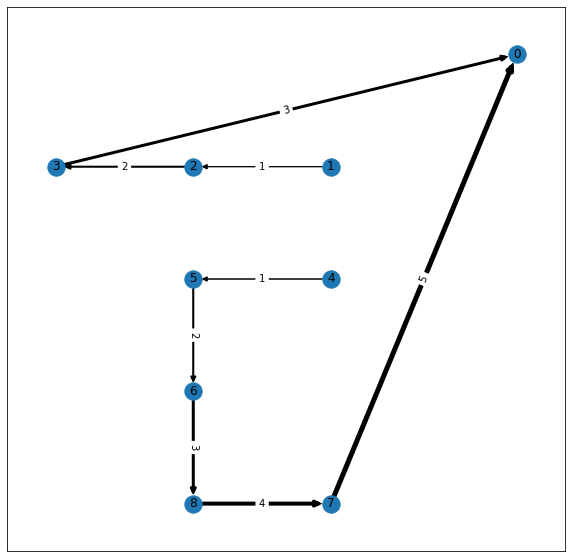

In [133]:
print("Gurobi runtime is", m.Runtime ,"seconds")
final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

#print(str(final_index // Q))
#print(str(final_index % Q))

for item in x_list:
    #print(item)
    
    index, level = item.split(',')
    
    #print(index, int(level) + 1)
    
    final_G.add_weighted_edges_from([(*edge, int(level)+1)  for edge, label in compelete_label.items() if label == index ])
    


    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)